<a href="https://colab.research.google.com/github/Megh-Zyke/Basic_MLprojects/blob/main/logistic/KNN_Logistic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN model of Prostate Cancer

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Prostate_Cancer (1).csv to Prostate_Cancer (1).csv


In [6]:
df = pd.read_csv("Prostate_Cancer (1).csv")
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [7]:
df.info() # getting the information on the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [8]:
df1 = df.drop(columns = "id")

In [9]:
df1.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [11]:
df1.diagnosis_result.value_counts()

M    62
B    38
Name: diagnosis_result, dtype: int64

In [12]:
df1.diagnosis_result = np.where(df1["diagnosis_result"] == 'M',1,0) # replacing the categorical data values as numericals

In [13]:
df1.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [15]:
x = df1.drop(columns = "diagnosis_result")
y = df1.diagnosis_result
print(x.shape,y.shape)

(100, 8) (100,)


In [16]:
x.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059


In [17]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: diagnosis_result, dtype: int64

In [18]:
# train_test_split
from sklearn.model_selection import train_test_split

In [74]:
x1,x2,y1,y2 = train_test_split(x,y,test_size = 0.3 ,stratify = y ,random_state = 6)

In [75]:
#importing the knn model
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier(n_neighbors = 3 , metric= "euclidean")

In [77]:
knn.fit(x1,y1) # fitting the model

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [78]:
y_pred = knn.predict(x2)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1])

In [79]:
# getting confusion matrix
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y2,y_pred)
m

array([[ 9,  2],
       [ 2, 17]])

In [80]:
# getting roc auc score
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [81]:
score = roc_auc_score(y2,y_pred)
score

0.8564593301435406

In [82]:
fpr , tpr , thres = roc_curve(y2,y_pred)
auc_acc  = auc(fpr,tpr)
auc_acc

0.8564593301435406

Text(0, 0.5, 'TPR')

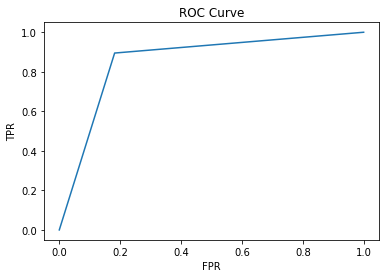

In [84]:
# plotting roc curve
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")

In [85]:
from sklearn.metrics import classification_report # getting classification report
print(classification_report(y2,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.89      0.89      0.89        19

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30



In [105]:
result = pd.DataFrame(columns = ["K","acc"])
for k in range(1,20):

  kn1 = KNeighborsClassifier(n_neighbors = k, metric = "euclidean")
  kn1.fit(x1,y1)
  y_pred1 = kn1.predict(x2)
  e = roc_auc_score(y2,y_pred1)
  result_ = pd.DataFrame({'K':[k] , 'acc':[e]})
  result = pd.concat([result,result_])
  print(k,e)

1 0.6483253588516746
2 0.8421052631578947
3 0.8564593301435406
4 0.9019138755980862
5 0.9282296650717702
6 0.9210526315789473
7 0.8373205741626794
8 0.8373205741626794
9 0.8373205741626794
10 0.8373205741626794
11 0.8373205741626794
12 0.9736842105263157
13 0.9736842105263157
14 0.9210526315789473
15 0.9736842105263157
16 0.9736842105263157
17 0.9736842105263157
18 0.9736842105263157
19 0.8373205741626794


In [106]:
result

,K,acc
0,1,0.648325
0,2,0.842105
0,3,0.856459
0,4,0.901914
0,5,0.928230
0,6,0.921053
0,7,0.837321
0,8,0.837321
0,9,0.837321
0,10,0.837321


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


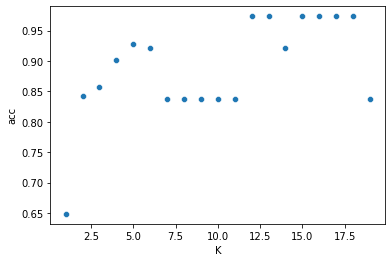

In [108]:
sns.scatterplot(result.K,result.acc)

KNN model for k = 17

In [155]:
knn = KNeighborsClassifier(n_neighbors = 17 , metric= "euclidean")

In [156]:
knn.fit(x1,y1) # fitting the model

KNeighborsClassifier(metric='euclidean', n_neighbors=17)

In [157]:
y_pred = knn.predict(x2)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1])

In [158]:
# getting confusion matrix
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y2,y_pred)
m

array([[11,  0],
       [ 1, 18]])

In [159]:
# getting roc auc score
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [160]:
score = roc_auc_score(y2,y_pred)
score

0.9736842105263157

In [161]:
fpr , tpr , thres = roc_curve(y2,y_pred)
auc_acc  = auc(fpr,tpr)
auc_acc

0.9736842105263157

Text(0, 0.5, 'TPR')

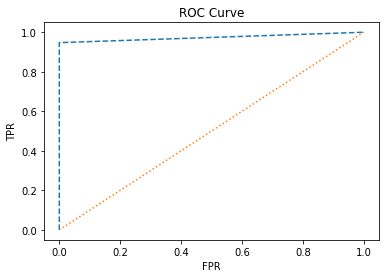

In [165]:
# plotting roc curve
plt.plot(fpr,tpr,linestyle ="--")
plt.plot([0,1],[0,1],linestyle="dotted")
plt.title("ROC Curve for k =17")
plt.xlabel("FPR")
plt.ylabel("TPR")

In [166]:
print(classification_report(y2,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.95      0.97        19

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Logistic Model

In [168]:
from sklearn.linear_model import LogisticRegression

In [182]:
model = LogisticRegression(random_state=2)
model.fit(x1,y1)# fitting logistic model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=2)

In [183]:
y_pred_l = model.predict(x2)

In [188]:
print("The score of testing data is :",model.score(x2,y2)*100,"%\nThe score of training data is :",model.score(x1,y1)*100,"%")

The score of testing data is : 90.0 %
The score of training data is : 84.28571428571429 %


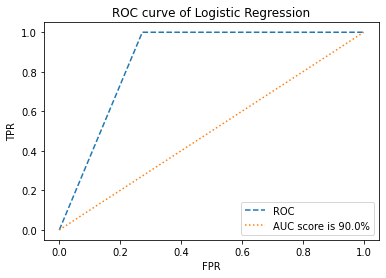

In [208]:
#plotting roc curve
fpr , tpr , thres = roc_curve(y2,y_pred_l)
plt.plot(fpr,tpr,linestyle = "--")
plt.plot([0,1],[0,1],linestyle = "dotted")
plt.title("ROC curve of Logistic Regression")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(["ROC" ,"AUC score is "+str(model.score(x2,y2)*100)+"%"] , loc = "lower right")